<a href="https://colab.research.google.com/github/NaziBaramaki/AngularCustomTemplate/blob/main/contrast_parameter_Effect_In_Perona-Malik_Method%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [1]:
from google.colab import files
uploaded = files.upload()

Saving office_noisy.png to office_noisy.png


In [3]:
# Load the "office_noisy" image
office_img = Image.open('office_noisy.png')
office_img = np.array(office_img)

In [4]:
def perona_malik_diffusion(image, lam, num_iterations):

    # Make a copy of the input image
    diffused_image = np.copy(image)

    for _ in range(num_iterations):
        # Compute the image gradients
        dx = np.gradient(diffused_image, axis=1)
        dy = np.gradient(diffused_image, axis=0)

        # Compute the gradient magnitude
        grad_mag = np.sqrt(dx**2 + dy**2)

        # Compute the Perona-Malik diffusivity
        diffusivity = 1.0 / (1.0 + (grad_mag / lam)**2)

        # Apply the Perona-Malik diffusion
        dx_diffused = diffusivity * dx
        dy_diffused = diffusivity * dy
        diffused_image[1:, 1:] = (
            diffused_image[1:, 1:] +
            dx_diffused[:-1, 1:] -
            dx_diffused[1:, :-1] +
            dy_diffused[1:, :-1] -
            dy_diffused[:-1, 1:]
        )

    return diffused_image

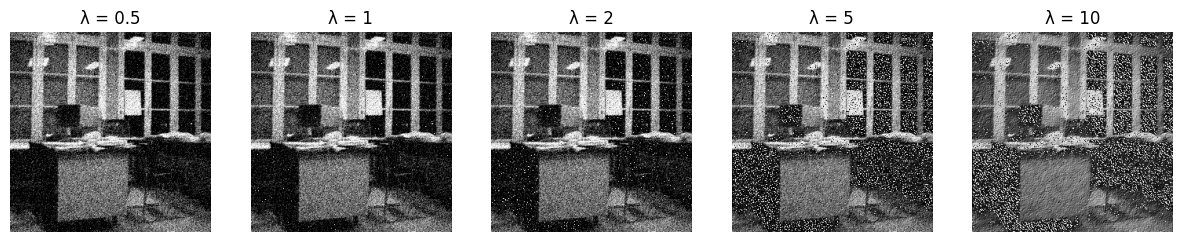

In [8]:
# Example usage
input_image = office_img
lambda_values = [0.5, 1, 2, 5, 10]
num_iterations = 10

fig, axes = plt.subplots(1, len(lambda_values), figsize=(15, 3))

for i, lam in enumerate(lambda_values):
    output_image = perona_malik_diffusion(input_image, lam, num_iterations)
    axes[i].imshow(output_image, cmap='gray')
    axes[i].set_title(f"λ = {lam}")
    axes[i].axis('off')

plt.show()